# LSH - Chroma MFCC

In [17]:
import librosa
import os
import os.path
import numpy as np
import IPython.display as ipd
import pandas as pd

In [18]:
training_dir = '../conv_genre_wavs/pop/'
training_files = [os.path.join(training_dir, f) for f in os.listdir(training_dir)]

In [19]:
def hash_func(vecs, projections):
    bools = np.dot(vecs, projections.T) > 0
    return [bool2int(bool_vec) for bool_vec in bools]

In [20]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        if j: y += 1<<i
    return y

In [21]:
bool2int([False, True, False, True])

10

In [22]:
class Table:
    
    def __init__(self, hash_size, dim):
        self.table = dict()
        self.hash_size = hash_size
        self.projections = np.random.randn(self.hash_size, dim)

    def add(self, vecs, label):
        entry = {'label': label}
        hashes = hash_func(vecs, self.projections)
        for h in hashes:
            if self.table.has_key(h):
                self.table[h].append(entry)
            else:
                self.table[h] = [entry]

    def query(self, vecs):
        hashes = hash_func(vecs, self.projections)
        results = list()
        for h in hashes:
            if self.table.has_key(h):
                results.extend(self.table[h])
        return results

In [29]:
class LSH:
    
    def __init__(self, dim):
        self.num_tables = 4
        self.hash_size = 1293
        self.tables = list()
        for i in range(self.num_tables):
            self.tables.append(Table(self.hash_size, dim))
    
    def add(self, vecs, label):
        for table in self.tables:
            table.add(vecs, label)
    
    def query(self, vecs):
        results = list()
        for table in self.tables:
            results.extend(table.query(vecs))
        return results

    def describe(self):
        for table in self.tables:
            print(table.table)

In [32]:
class MusicSearch:
    
    def __init__(self, training_files):
        self.frame_size = 4096
        self.hop_size = 4000
        self.fv_size = 12
        self.n_mfcc = 12
        self.lsh = LSH(self.fv_size)
        self.training_files = training_files
        self.num_features_in_file = dict()
        for f in self.training_files:
            self.num_features_in_file[f] = 0
                
    def train(self):
        for filepath in self.training_files:
            y,sr = librosa.load(filepath)
            features = librosa.feature.mfcc(y,sr,n_mfcc=self.n_mfcc).T
            self.lsh.add(features, filepath)
            self.num_features_in_file[filepath] += len(features)
                
    def query(self, filepath):
        y, sr = librosa.load(filepath)
        features = librosa.feature.chroma_stft(y, sr, n_fft=self.frame_size, hop_length=self.hop_size).T
        results = self.lsh.query(features)
        print('num results', len(results))

        counts = dict()
        for r in results:
            if counts.has_key(r['label']):
                counts[r['label']] += 1
            else:
                counts[r['label']] = 1
        for k in counts:
            counts[k] = float(counts[k])/self.num_features_in_file[k]
        return counts

In [33]:
ms = MusicSearch(training_files)
ms.train()

In [31]:
test_file = '../conv_genre_wavs/pop/Pop.00079.wav'
results = ms.query(test_file)

('num results', 1507064)


In [20]:
len(results)

100

In [16]:
g = []
for r in sorted(results, key=results.get, reverse=True):
    print(r,results[r])
    g.append([r,results[r]])


NameError: name 'results' is not defined

In [23]:
matching_songs = []
for r in sorted(results, key=results.get, reverse=True):
#     print(r,results[r])
    matching_songs.append([r,results[r]])

In [24]:
sim_score = 0
playlist = []
m = 1200
a = []
b = []


sim_scores = []
for i in range(len(matching_songs)-1):
    if i < len(matching_songs):
        sim_score = matching_songs[i+1][1] - matching_songs[i][1]
        a.append(matching_songs[i+1][0])
        b.append(matching_songs[i][0])
        sim_scores.append(sim_score)
#         playlist.append([matching_songs[i], sim_score])
        
data = {"A" : a, "B": b, "Sim Scores": sim_scores}

In [27]:
similar_songs[0]

NameError: name 'similar_songs' is not defined

In [112]:
playlist

[[['./conv_genre_wavs/rock/rock.00093.wav', 12.837349397590362],
  1.234939759036143],
 [['./conv_genre_wavs/rock/rock.00049.wav', 14.072289156626505],
  0.024096385542168974],
 [['./conv_genre_wavs/rock/rock.00044.wav', 14.096385542168674],
  1.168674698795181],
 [['./conv_genre_wavs/rock/rock.00094.wav', 15.265060240963855],
  0.30722891566265],
 [['./conv_genre_wavs/rock/rock.00059.wav', 15.572289156626505],
  0.10240963855421725],
 [['./conv_genre_wavs/rock/rock.00033.wav', 15.674698795180722],
  0.8975903614457845],
 [['./conv_genre_wavs/rock/rock.00069.wav', 16.572289156626507],
  0.024096385542168974],
 [['./conv_genre_wavs/rock/rock.00061.wav', 16.596385542168676],
  0.4397590361445758],
 [['./conv_genre_wavs/rock/rock.00009.wav', 17.03614457831325],
  0.2710843373494001],
 [['./conv_genre_wavs/rock/rock.00099.wav', 17.30722891566265],
  1.5301204819277103],
 [['./conv_genre_wavs/rock/rock.00098.wav', 18.837349397590362],
  0.08433734939758963],
 [['./conv_genre_wavs/rock/rock.

In [109]:
df = pd.DataFrame()

('./conv_genre_wavs/rock/rock.00066.wav',
 './conv_genre_wavs/rock/rock.00057.wav',
 0.0)

In [110]:
ipd.Audio(a,rate=22050)

In [111]:
ipd.Audio(b,rate=22050)

In [105]:
playlist

[[['./conv_genre_wavs/rock/rock.00093.wav', 12.837349397590362],
  1.234939759036143],
 [['./conv_genre_wavs/rock/rock.00049.wav', 14.072289156626505],
  0.024096385542168974],
 [['./conv_genre_wavs/rock/rock.00044.wav', 14.096385542168674],
  1.168674698795181],
 [['./conv_genre_wavs/rock/rock.00094.wav', 15.265060240963855],
  0.30722891566265],
 [['./conv_genre_wavs/rock/rock.00059.wav', 15.572289156626505],
  0.10240963855421725],
 [['./conv_genre_wavs/rock/rock.00033.wav', 15.674698795180722],
  0.8975903614457845],
 [['./conv_genre_wavs/rock/rock.00069.wav', 16.572289156626507],
  0.024096385542168974],
 [['./conv_genre_wavs/rock/rock.00061.wav', 16.596385542168676],
  0.4397590361445758],
 [['./conv_genre_wavs/rock/rock.00009.wav', 17.03614457831325],
  0.2710843373494001],
 [['./conv_genre_wavs/rock/rock.00099.wav', 17.30722891566265],
  1.5301204819277103],
 [['./conv_genre_wavs/rock/rock.00098.wav', 18.837349397590362],
  0.08433734939758963],
 [['./conv_genre_wavs/rock/rock.

TypeError: 53.1566265060241 is not a string

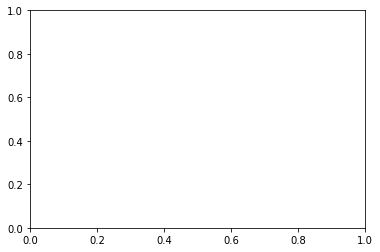

In [85]:
import matplotlib.pyplot as plt


plt.scatter(matching_songs[0],matching_songs[1])

In [69]:
ipd.Audio(matching_songs[0],rate=22050)

In [70]:
ipd.Audio(matching_songs[1],rate=22050)

In [62]:
ipd.Audio(results[r][0],rate=22050)

TypeError: 'float' object has no attribute '__getitem__'

In [ ]:
ipd.Audio(results[r][1],rate=22050)